In [1]:
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
# Initialization

tau = 3.052 * 60 # Half-life convert in seconds

times = np.arange(0, 1000, 1) # steps time of 1 second 

# Counter of atoms
Tl_counter = 1000
Pb_counter = 0

# Storage of the evolution of the quantity of atoms over time
Tl = [Tl_counter]  # Initialization of Tl count
Pb = [Pb_counter]  # Initialization of Pb count

In [3]:
# Function of decay probability
def decay_probability(t, tau):
    return 1 - 2**(-t/tau)

In [4]:
# Simulation of decay over time
for t in times[1:] : # Starts at 1 rather than 0 to avoid the initialization phase where Tl = 1000 and Pb = 0
    for i in range(0, Tl_counter) :
        if np.random.random() < decay_probability(1, tau) : # if Tl atom has decayed or not
                Tl_counter -= 1     
                Pb_counter += 1
    Tl.append(Tl_counter)
    Pb.append(Pb_counter)

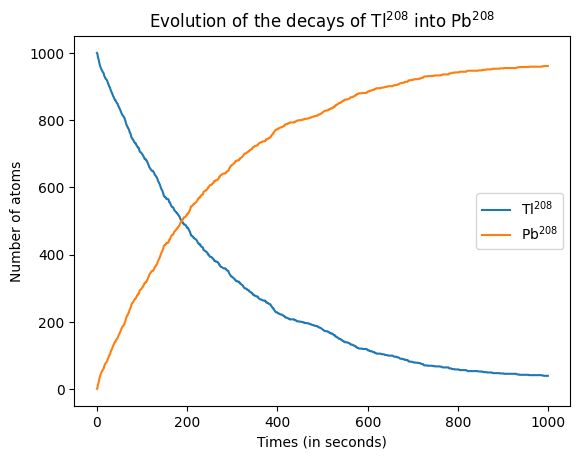

In [5]:
# Plot
plt.plot(times, Tl, label = r'${\rm Tl}^{208}$')
plt.plot(times, Pb, label = r'${\rm Pb}^{208}$')
plt.title(r'Evolution of the decays of ${\rm Tl}^{208}$ into ${\rm Pb}^{208}$')
plt.xlabel('Times (in seconds)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

- **Exponential Distribution and Decay Rate :**

Radioactive decay follows an exponential distribution, with a probability density function given by $f(t) = \lambda e^{-\lambda t}$, avec $\lambda = \frac{\ln 2}{\tau}$.

- **Cumulative Distribution Function (CDF):**
The cumulative distribution function (CDF) for an exponential distribution is $F(t) = 1 - e^{-\lambda t}$.

- **Inverse Transform Method:**
To generate values that follow an exponential distribution, we use a uniform random variable $U$ and find $t$ such that $F(t) = U$. This leads to the equation $1 - e^{-\lambda t} = U$.

- **Calculating Decay Time:**
By solving for $t$, we obtain $e^{-\lambda t} = 1 - U$, then $-\lambda t = \ln(1 - U)$. Substituting $\lambda = \frac{\ln 2}{\tau}$, we have:

$t = -\frac{1}{\frac{\ln 2}{\tau}} \ln(1 - U)$
$t = -\frac{\tau}{\ln 2} \ln(1 - U)$

Radioactive decay follows an exponential distribution with a probability density function: $f(t) = \lambda e^{-\lambda t}$, where $\lambda = \frac{\ln 2}{\tau}$.

So, for an exponential distribution, we have: $F(t) = 1 - e^{-\lambda t}$.

- **Inverse Transform Method :**
To apply this method, we use a uniform random variable $Z$ and find $t$ such that $F(t) = Z$.

So :

$$\begin{align*}
&\Leftrightarrow 1 - e^{-\lambda t} = Z \\
&\Leftrightarrow e^{-\lambda t} = 1 - Z \\
&\Leftrightarrow -\lambda t = \ln(1 - Z) \text{ with } \lambda = \frac{\ln 2}{\tau} \\
&\Leftrightarrow t = -\frac{1}{\frac{\ln 2}{\tau}} \ln(1 - Z) \\
&\Leftrightarrow t = -\frac{\tau}{\ln 2} \ln(1 - Z)
\end{align*}$$


In [6]:
# Initialization of the Inverse Method
def inverse_method(z, tau):
    return -(tau/np.log(2))*np.log(1-z)

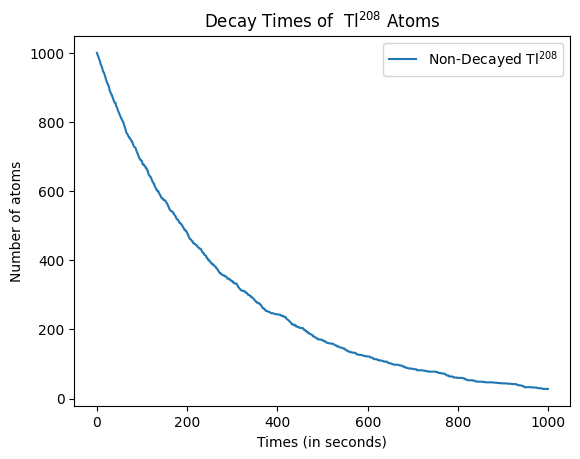

In [7]:
Tl_counter = 1000
Tl = []

# Decay times for Tl using the inverse method
Tl = [inverse_method(np.random.uniform(0, 1), tau) for i in range(Tl_counter)]
Tl = np.sort(np.array(Tl))

# Number of non-decayed Tl atoms
non_decayed_atoms = [np.sum(Tl > t) for t in times]

plt.plot(times, non_decayed_atoms, label = r'Non-Decayed ${\rm Tl}^{208}$')
plt.title(r'Decay Times of  ${\rm Tl}^{208}$ Atoms')
plt.xlabel('Times (in seconds)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [8]:
# Define the function f(x)
def f(x):
    return np.sin(1 / (1 - x))**2

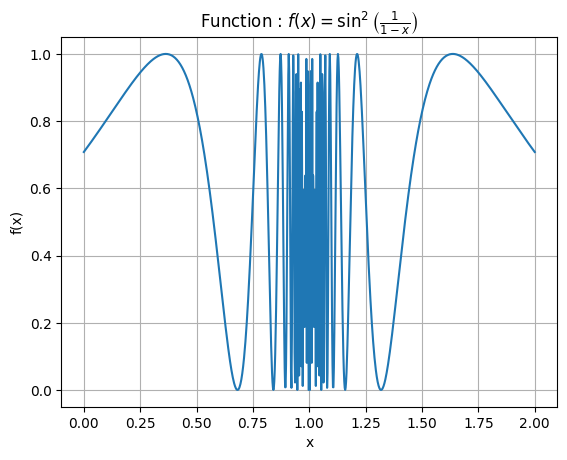

In [9]:
# Initialization
x = np.linspace(0, 2, 1000)
y = f(x)

# Plot
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'Function : $f(x) = \sin^2\left( \frac{1}{1-x} \right)$')
plt.grid(True)
plt.show()

In [10]:
Num_iterations = 100

# Monte Carlo integration

# Initialization
N = 100000
count = 0
a, b, h = 0, 1, 2

# Method
I = []
for i in range(Num_iterations):
    count = 0
    for j in range(N):
        x = h * np.random.random() # x is random uniform between 0 and 2
        y = (b - a) * np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): 
            count += 1
    I.append(count/N*h*(b-a))
            
# Results
print("Monte Carlo integration")
print(f"\t=> Integral : {np.mean(I)}")
print(f"\t=> Error : {np.std(I)}")

Monte Carlo integration
	=> Integral : 1.3466324
	=> Error : 0.0030951404233087697


For the mean value method, we use this function : 
$$
I=\frac{b-a}{N} \sum_{i=1}^{N} f(x_i)
$$

In [11]:
# Mean value Method

# Initialization
N = 100000
a, b = 0, 2
x = np.random.uniform(a, b, N)

fx = f(x)

# Methods
I = (b-a)*np.sum(fx)/N
error = (b-a)*np.std(fx)/np.sqrt(N)

# Results
print("Mean value Method")
print(f"\t=> Integral : {I}")
print(f"\t=> Error : {error}")

Mean value Method
	=> Integral : 1.3496310616758136
	=> Error : 0.002065051859511212


In [12]:
# The integral values obtained by the two methods are very close, indicating consistency in the results. 
# This suggests that both methods are reliable for estimating the integral of this specific function.
# In addition, the mean-value method has a slightly smaller error than the Monte Carlo integration method. 
# This implies that the mean-value method may be slightly more accurate for this specific integral.

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [13]:
# Define the function f(x, y)
def f(x, y):
    return x**2 + y**2 <= 1

In [14]:
# Initialization
N = 100000
a, b = 1, -1

# Generate random points
x = np.random.uniform(b, a, N)
y = np.random.uniform(b, a, N)

In [15]:
# Calculate number of points in the circle
points_in_circle = np.sum(f(x, y))

# Area of the circle
I = (b-a)**2 * points_in_circle / N
print(f"Area of the circle of unit radius : {I}")

Area of the circle of unit radius : 3.1454


For 10D Sphere :

In [16]:
# Define the function f_10D(points) for the 10D sphere
def f_10D(points):
    return np.sum(points**2, axis=1) <= 1

In [17]:
# Initialization
N = 100000
a, b = 1, -1
dim = 10

# Generate random points in 10D space
points = np.random.uniform(b, a, (N, dim))

In [18]:
# Calculate number of points in the sphere
points_in_sphere = np.sum(f_10D(points))

# Volume of the 10D sphere
I = (b-a)**dim * points_in_sphere / N
print(f"Volume of the 10D Sphere : {I}")

Volume of the 10D Sphere : 2.48832


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

We will apply the following formula which uses the weight function :
$$
I = \left\langle \frac{f(x)}{w(x)} \right\rangle \int_a^b w(x) \, dx \approx \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{w(x_i)} \int_a^b w(x) \, $$

So :
$$
I = \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{w(x_i)} \int_a^b w(x) \, dx
$$


In [19]:
# Define functions

def f(x):
    return (x**(-1/2))/(np.exp(x) + 1)
    
def w(x):
    return 1/np.sqrt(x)

def f_div_w(x) : 
    return 1/(np.exp(x) + 1)

In [20]:
# Initialization
N = 100000
a, b = 0, 1

In [21]:
# Integral of the weight function with mean value method

# Generate random points x
x = np.random.uniform(a, b, N)

wx = w(x)

# Methods
Integral_w = (b-a)*np.sum(wx)/N
print(f"Estimation of the integral of w(x) : {Integral_w}")


Estimation of the integral of w(x) : 1.980423145906571


We need to optimally choose the weight function to reduce and minimize the variance of the integrand $\frac{f(x)}{w(x)} \$.

We set : $ x = z^2 $. 
This allows us to transform the weight function $ w(x) $ into a function of $ z $.

By substituting $ x $ with $ z^2 $ in $ w(x) $, we obtain:
$$ w(x) = w(z^2) $$

The original weight function being $ w(x) = \frac{1}{\sqrt{x}} $, this transforms into $ w(z^2) = \frac{1}{\sqrt{z^2}} $, which simplifies to $ \frac{1}{z} $.

Since the weight function $ w(x) = \frac{1}{\sqrt{x}} $ is not defined for $ x = 0 $, therefore $ w(z) = \frac{1}{z} $ should also not be evaluated for $ z = 0 $. 

We thus limit $ z $ to $ ]0,1] $.


In [22]:
# Sum of the f(x)/w(x)

# Generate random points z
z = np.random.uniform(a, b, N)

x = z**2

# Methods
Sum_f_div_w = [f_div_w(i) for i in x]
print(f"Estimation of the sum of f(x)/w(x) : {Integral_w}")

Estimation of the sum of f(x)/w(x) : 1.980423145906571


In [23]:
# Results 
I = 1/N*np.sum(Sum_f_div_w)*Integral_w

print(f"Value of the integral : {I} (near to 0.84)")

Value of the integral : 0.8301699690307877 (near to 0.84)
